In [1]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

import sklearn


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import seaborn as sns

import pydot

electric_product = pd.read_csv("C:/Users/vikar/Desktop/Viraj Karkar/Technocolab/Supervised ML Task-1/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv", usecols=['reviews_text', 'reviews_rating','primaryCategories', 'id'])
electric_product1 = pd.read_csv("C:/Users/vikar/Desktop/Viraj Karkar/Technocolab/Supervised ML Task-1/1429_1.csv", usecols=['reviews_text', 'reviews_rating','primaryCategories', 'id'])
electric_product2 = pd.read_csv("C:/Users/vikar/Desktop/Viraj Karkar/Technocolab/Supervised ML Task-1/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv", usecols=['reviews_text', 'reviews_rating','primaryCategories', 'id'])

In [2]:
electric = pd.concat([electric_product,electric_product1,electric_product2])
electric

,id,primaryCategories,reviews_rating,reviews_text
0,AVpgNzjwLJeJML43Kpxn,Health & Beauty,3.0,I order 3 of them and one of the item is bad q...
1,AVpgNzjwLJeJML43Kpxn,Health & Beauty,4.0,Bulk is always the less expensive way to go fo...
2,AVpgNzjwLJeJML43Kpxn,Health & Beauty,5.0,Well they are not Duracell but for the price i...
3,AVpgNzjwLJeJML43Kpxn,Health & Beauty,5.0,Seem to work as well as name brand batteries a...
4,AVpgNzjwLJeJML43Kpxn,Health & Beauty,5.0,These batteries are very long lasting the pric...
...,...,...,...,...
4995,AVqkIdZiv8e3D1O-leaJ,Electronics,5.0,This is a great tablet for the price. Amazon i...
4996,AVqkIdZiv8e3D1O-leaJ,Electronics,5.0,This tablet is the perfect size and so easy to...
4997,AVqkIdZiv8e3D1O-leaJ,Electronics,4.0,Purchased this for my son. Has room to upgrade...
4998,AVqkIdZiv8e3D1O-leaJ,Electronics,5.0,I had some thoughts about getting this for a 5...


In [14]:

print(tf.__version__)
#policy = mixed_precision.Policy('mixed_float16')
#mixed_precision.set_policy(policy)

2.5.0


In [16]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [9]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower()

In [10]:
print(electric.head(10))
print(len(electric))
print('Unique Products')
print(len(electric.groupby('id')))

                     id primaryCategories  reviews_rating  \
0  AVpgNzjwLJeJML43Kpxn   Health & Beauty             3.0   
1  AVpgNzjwLJeJML43Kpxn   Health & Beauty             4.0   
2  AVpgNzjwLJeJML43Kpxn   Health & Beauty             5.0   
3  AVpgNzjwLJeJML43Kpxn   Health & Beauty             5.0   
4  AVpgNzjwLJeJML43Kpxn   Health & Beauty             5.0   
5  AVpgNzjwLJeJML43Kpxn   Health & Beauty             5.0   
6  AVpgNzjwLJeJML43Kpxn   Health & Beauty             5.0   
7  AVpgNzjwLJeJML43Kpxn   Health & Beauty             5.0   
8  AVpgNzjwLJeJML43Kpxn   Health & Beauty             3.0   
9  AVpgNzjwLJeJML43Kpxn   Health & Beauty             4.0   

                                        reviews_text  
0  I order 3 of them and one of the item is bad q...  
1  Bulk is always the less expensive way to go fo...  
2  Well they are not Duracell but for the price i...  
3  Seem to work as well as name brand batteries a...  
4  These batteries are very long lasting the pric... 

In [11]:

electric.dropna(axis = 0, how ='any',inplace=True)
electric['reviews_text'] = electric['reviews_text'].apply(clean_text)
# electric['reviews_text'] = electric['reviews_text'].apply(remove_url)
electric['Num_words_text'] = electric['reviews_text'].apply(lambda x:len(str(x).split()))

In [12]:
print('-------Dataset --------')
print(electric['reviews_rating'].value_counts())
print(len(electric))
print('-------------------------')
max_electric_sentence_length  = electric['Num_words_text'].max()

print('Train Max Sentence Length :'+str(max_electric_sentence_length))


#all_sentences = train_data['text'].tolist() + test_data['text'].tolist()

-------Dataset --------
5.0    47149
4.0    15397
3.0     2902
1.0     1438
2.0     1072
Name: reviews_rating, dtype: int64
67958
-------------------------
Train Max Sentence Length :1455


In [13]:
electric['Num_words_text'].describe()

count    67958.000000
mean        21.782778
std         27.700945
min          0.000000
25%          9.000000
50%         15.000000
75%         26.000000
max       1455.000000
Name: Num_words_text, dtype: float64

<AxesSubplot:xlabel='Num_words_text'>

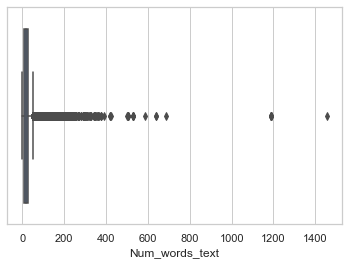

In [14]:
sns.set(style="whitegrid")
sns.boxplot(x=electric['Num_words_text'])

In [15]:
mask = (electric['Num_words_text'] < 100) & (electric['Num_words_text'] >=20)
electric_short_reviews = electric[mask]
print('No of Short reviews')
print(len(electric_short_reviews))

mask = electric['Num_words_text'] >= 100
electric_long_reviews = electric[mask]
print('No of Long reviews')
print(len(electric_long_reviews))

No of Short reviews
23414
No of Long reviews
1002


In [16]:
print(electric_short_reviews['Num_words_text'].max())

99


In [17]:
def get_sentiment(rating):
    if rating == 5 or rating == 4 or rating ==3:
        return 1
    else:
        return 0

In [18]:
electric_short_reviews['reviews_rating'].value_counts()
filtered_data = electric_short_reviews.groupby('id').filter(lambda x: len(x) >= 20)
print(len(filtered_data))
print(filtered_data ['reviews_rating'].value_counts())
filtered_data ['sentiment'] = filtered_data ['reviews_rating'].apply(get_sentiment)
#train_data = electric_short_reviews.sample(n=30000, random_state =0)
train_data = filtered_data[['reviews_text','sentiment']]
print('Train data')
print(train_data['sentiment'].value_counts())


#Create Test Data
mask = electric['Num_words_text'] < 100 
df_short_reviews = electric[mask]
filtered_data = electric_short_reviews.groupby('id').filter(lambda x: len(x) >= 10)
print(len(filtered_data))
print(filtered_data ['reviews_rating'].value_counts())
filtered_data ['sentiment'] = filtered_data ['reviews_rating'].apply(get_sentiment)
#train_data = df_short_reviews.sample(n=200000, random_state =0)
test_data = filtered_data[['reviews_text','sentiment']]
print('Test data')
print(test_data['sentiment'].value_counts())

23247
5.0    14943
4.0     5867
3.0     1224
1.0      670
2.0      543
Name: reviews_rating, dtype: int64
Train data
1    22034
0     1213
Name: sentiment, dtype: int64
23307
5.0    14975
4.0     5883
3.0     1227
1.0      675
2.0      547
Name: reviews_rating, dtype: int64
Test data
1    22085
0     1222
Name: sentiment, dtype: int64


In [19]:
train_data['sentiment'].value_counts()

1    22034
0     1213
Name: sentiment, dtype: int64

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['reviews_text'].tolist(),\
                                                      train_data['sentiment'].tolist(),\
                                                      test_size=0.5,\
                                                      stratify = train_data['sentiment'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

Train data len:11623
Class distributionCounter({1: 11017, 0: 606})
Valid data len:11624
Class distributionCounter({1: 11017, 0: 607})


In [22]:
num_words = 90000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

[[1, 96, 18, 12]]


In [23]:
x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test_data['reviews_text'].tolist()) )



x_train = pad_sequences(x_train, padding='post', maxlen=100)
x_valid = pad_sequences(x_valid, padding='post', maxlen=100)
x_test = pad_sequences(x_test, padding='post', maxlen=100)



train_labels = np.asarray(y_train )
valid_labels = np.asarray( y_valid)

test_labels = np.asarray(test_data['sentiment'].tolist())

print('Train data len:'+str(len(x_train)))
print('Class distribution'+str(Counter(train_labels)))

print('Validation data len:'+str(len(x_valid)))
print('Class distribution'+str(Counter(valid_labels)))

print('Test data len:'+str(len(x_test)))
print('Class distribution'+str(Counter(test_labels)))


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

Train data len:11623
Class distributionCounter({1: 11017, 0: 606})
Validation data len:11624
Class distributionCounter({1: 11017, 0: 607})
Test data len:23307
Class distributionCounter({1: 22085, 0: 1222})


In [24]:
max_features =50000
embedding_dim =16
sequence_length = 100

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
                               



model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           800016    
_________________________________________________________________
dropout (Dropout)            (None, 100, 16)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100, 16)           2112      
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               819712    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 4

In [27]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [30]:
epochs = 12
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/12
12/12 [==============================] - 11s 918ms/step - loss: 0.2901 - binary_accuracy: 0.9524 - val_loss: 0.2661 - val_binary_accuracy: 0.9557
Epoch 2/12
12/12 [==============================] - 8s 690ms/step - loss: 0.2694 - binary_accuracy: 0.9566 - val_loss: 0.2623 - val_binary_accuracy: 0.9558
Epoch 3/12
12/12 [==============================] - 8s 675ms/step - loss: 0.2574 - binary_accuracy: 0.9604 - val_loss: 0.2686 - val_binary_accuracy: 0.9586
Epoch 4/12
12/12 [==============================] - 7s 618ms/step - loss: 0.2416 - binary_accuracy: 0.9615 - val_loss: 0.2490 - val_binary_accuracy: 0.9616
Epoch 5/12
12/12 [==============================] - 8s 630ms/step - loss: 0.2288 - binary_accuracy: 0.9667 - val_loss: 0.2619 - val_binary_accuracy: 0.9624
Epoch 6/12
12/12 [==============================] - 8s 662ms/step - loss: 0.2243 - binary_accuracy: 0.9685 - val_loss: 0.2337 - val_binary_accuracy: 0.9642
Epoch 7/12
12/12 [==============================] - 7s 611ms/st

In [92]:
history.history

{'loss': [3.6862642765045166,
  1.8537548780441284,
  0.9809419512748718,
  0.6105042099952698,
  0.4567923843860626,
  0.39322230219841003,
  0.3467240035533905,
  0.3092344105243683,
  0.28134459257125854,
  0.25565242767333984],
 'binary_accuracy': [0.938398003578186,
  0.9478619694709778,
  0.9478619694709778,
  0.9478619694709778,
  0.9478619694709778,
  0.9478619694709778,
  0.9478619694709778,
  0.9482921957969666,
  0.9531102180480957,
  0.9597350358963013],
 'val_loss': [2.4328842163085938,
  1.2176071405410767,
  0.683634877204895,
  0.4732134938240051,
  0.3916155993938446,
  0.3462780714035034,
  0.31877759099006653,
  0.2914365530014038,
  0.2713083326816559,
  0.2607590854167938],
 'val_binary_accuracy': [0.947780430316925,
  0.947780430316925,
  0.947780430316925,
  0.947780430316925,
  0.947780430316925,
  0.947780430316925,
  0.947780430316925,
  0.947780430316925,
  0.9575017094612122,
  0.958448052406311]}

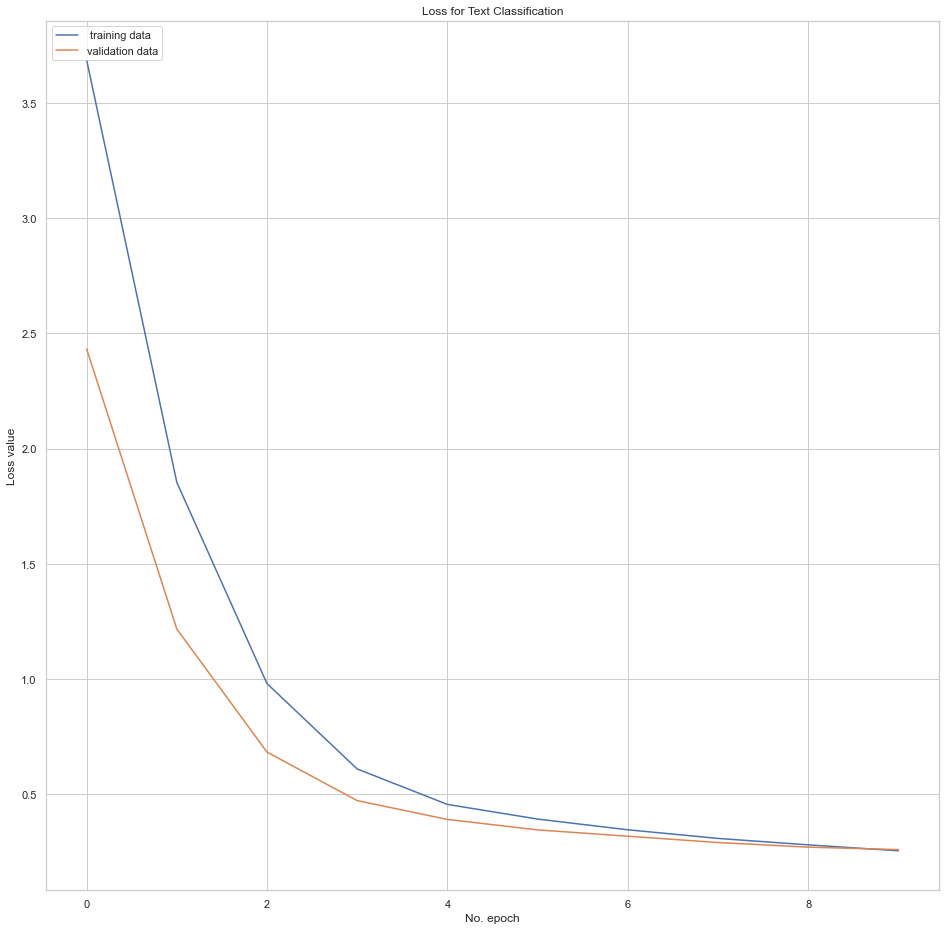

In [93]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

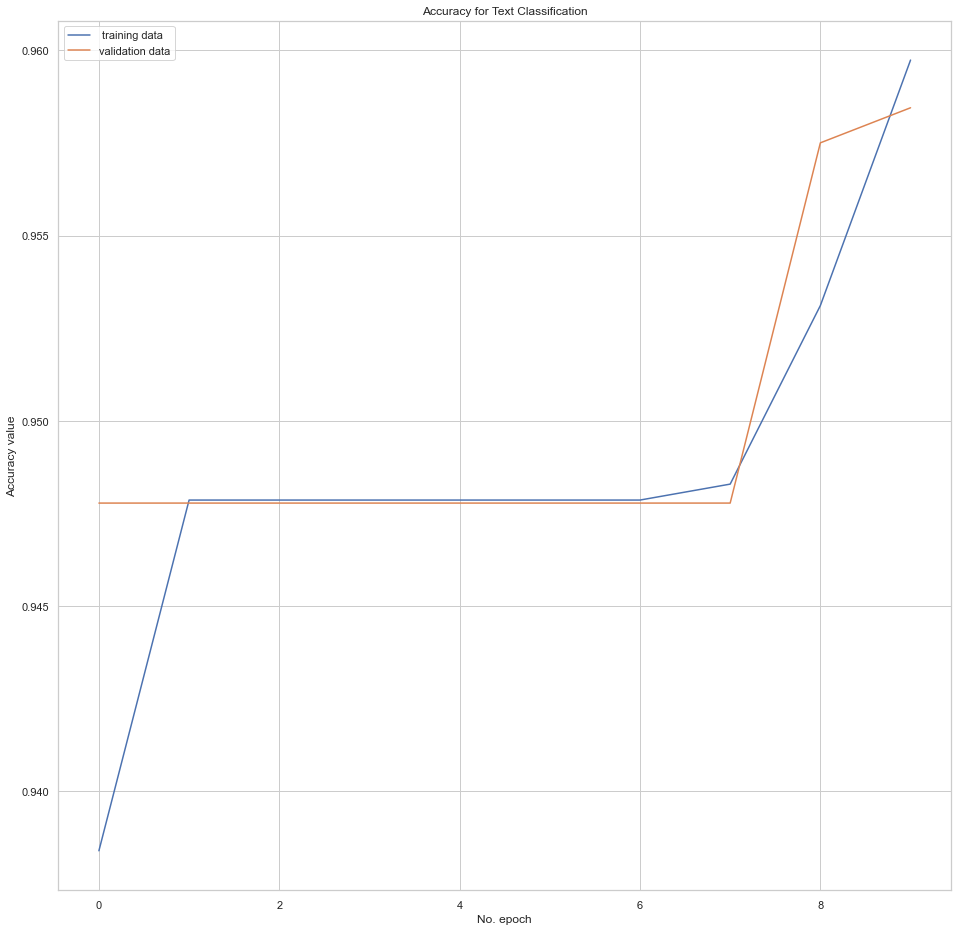

In [94]:
plt.plot(history.history['binary_accuracy'], label=' training data')
plt.plot(history.history['val_binary_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [95]:
model.save('C:\\Users\\vikar\\Desktop\\Viraj Karkar\\Technocolab\\Supervised ML Task-1\\savedTFLSTMModel\\tf_lstmmodel.h5') 
json_string = tokenizer.to_json()

In [96]:
import json
with open('C:\\Users\\vikar\\Desktop\\Viraj Karkar\\Technocolab\\Supervised ML Task-1\\savedTFLSTMModel\\tokenizer.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [97]:
valid_predict= model.predict(x_valid)

In [98]:
print(valid_predict[:10])

[[0.99901026]
 [0.9966001 ]
 [0.99943626]
 [0.9999377 ]
 [0.9950373 ]
 [0.9995741 ]
 [0.9870837 ]
 [0.99999833]
 [0.9996746 ]
 [0.99335444]]


In [99]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives Rate')
    plt.ylabel('True positives Rate')
    plt.xlim([-0.03, 1.0])
    plt.ylim([0.0, 1.03])
    plt.grid(True)
    thresholdsLength = len(thresholds)
    thresholds_every = 1000
    colorMap = plt.get_cmap('jet', thresholdsLength)
    for i in range(0, thresholdsLength, thresholds_every):
        threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
        plt.text(fp[i] - 0.03, tp[i] + 0.001, threshold_value_with_max_four_decimals, fontdict={'size': 15}, color=colorMap(i/thresholdsLength));

    ax = plt.gca()
    ax.set_aspect('equal')

In [100]:
mpl.rcParams['figure.figsize'] = (16, 16)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

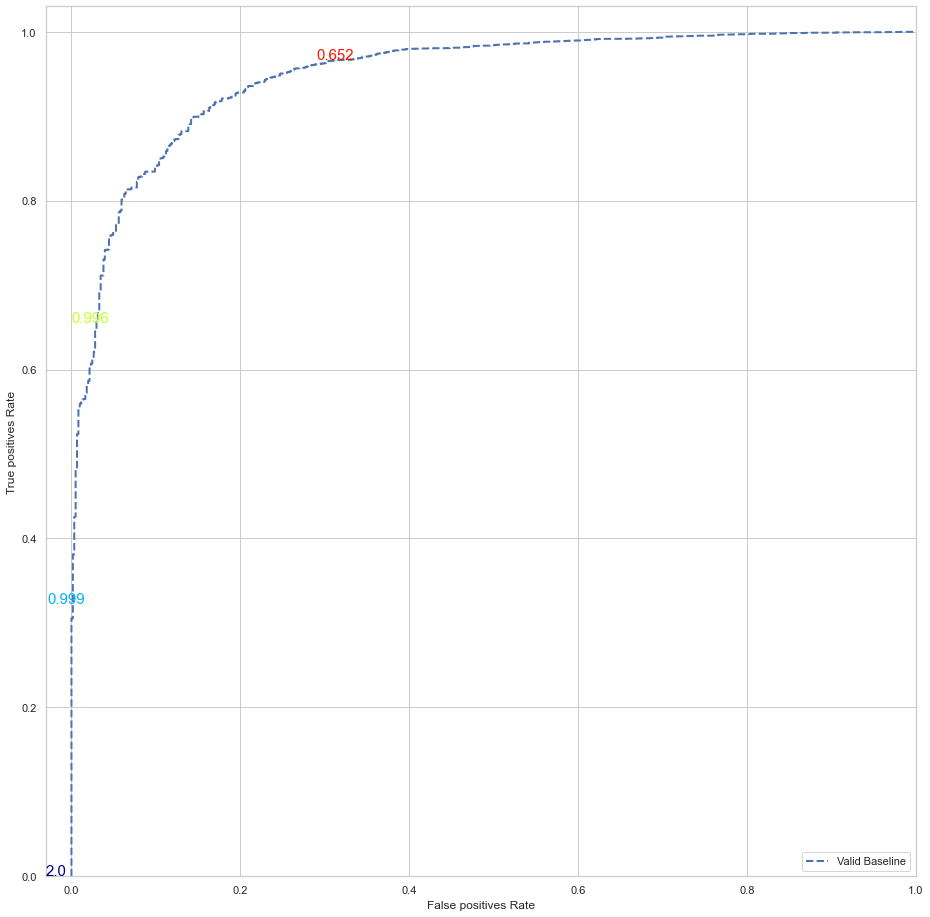

In [101]:

plot_roc("Valid Baseline", valid_labels, valid_predict, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [102]:
new_model = tf.keras.models.load_model("C:\\Users\\vikar\\Desktop\\Viraj Karkar\\Technocolab\\Supervised ML Task-1\\savedTFLSTMModel\\tf_lstmmodel.h5")
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           800016    
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 16)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 16)           2112      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               819712    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                

In [103]:
with open('C:\\Users\\vikar\\Desktop\\Viraj Karkar\\Technocolab\\Supervised ML Task-1\\savedTFLSTMModel\\tokenizer.json') as json_file:
    json_string = json.load(json_file)
tokenizer1 = tf.keras.preprocessing.text.tokenizer_from_json(json_string)

In [104]:
x_test  = np.array( tokenizer.texts_to_sequences(test_data['reviews_text'].tolist()) )
x_test = pad_sequences(x_test, padding='post', maxlen=100)

<ipython-input-104-f3ca7118897a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test  = np.array( tokenizer.texts_to_sequences(test_data['reviews_text'].tolist()) )


In [105]:
# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = new_model.predict(x_test)

Generate predictions for all samples


In [106]:
test_data['pred_sentiment']= predictions
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment >= 0.78),1,test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment < 0.78),0,test_data.pred_sentiment)

<ipython-input-106-570b55e7850f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred_sentiment']= predictions
<ipython-input-106-570b55e7850f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred_sentiment'] = np.where((test_data.pred_sentiment >= 0.78),1,test_data.pred_sentiment)
<ipython-input-106-570b55e7850f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [107]:
labels = [0, 1]
    
print(classification_report(test_data['sentiment'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))    

              precision    recall  f1-score   support

           0       0.51      0.83      0.63      1222
           1       0.99      0.96      0.97     22085

    accuracy                           0.95     23307
   macro avg       0.75      0.89      0.80     23307
weighted avg       0.97      0.95      0.95     23307

